## QR factorization

### Why do we care?

- QR factorization gives a better way to find least square solution.
- It is used to compute eigenvalues. (a future topic)
- It gives a direct method to solve system of linear equations. (But not as efficient as LU)

### Gram-Schmidt orthogonalization

#### Overview

##### Problem of interest

**Problem of interes**

Given linearly independent vectors $A_1, \cdots, A_n \in\mathbb{R}^m$ ($n\le m$) find orthonormal vectors $q_1, \cdots, q_n \in\mathbb{R}^m$ that span the same space as $A_1, \cdots, A_n$ do. 

#### Notation and settings

- Switch back and forth between column and row vector depending on convenience of writing/typing. Ask anytime when there is any confusion due to this.

#### What we can do

##### Idea

**Idea**: Recursively subtract out perpendicular components.

**Example** 

Find orthonormal vectors that span the same space as 
$$
A_1 = (1,-1,1)^T,
A_2 = (1,0,1)^T,
A_3 = (1,1,2)^T
$$

**TBA**: CalcPlot3D desired

$$
\begin{aligned}
y_1 &= A_1=(1,-1,1)
\\
q_1 &= \frac{y_1}{\left\|y_1\right\|_2} 
= \frac{1}{\sqrt{3}} \left(1, -1, 1\right)
\end{aligned}
$$

$$
\begin{aligned}
y_2 &= A_2-q_1\left(q_1^T A_2\right)  =(1,0,1)-\frac{2}{3}(1,-1,1) =\left(\frac{1}{3}, \frac{2}{3}, \frac{1}{3}\right)
\\
q_2 &= \frac{y_2}{\left\|y_2\right\|_2} = \frac{1}{\sqrt{6}} (1, 2, 1)
\end{aligned}
$$


$$
\begin{aligned}
y_3 &= A_3-q_1\left(q_1^T A_3\right) -q_2\left(q_2^T A_3\right) 
    \\
& =(1,1,2)-\frac{2}{3}(1,-1,1)-\frac{5}{6}\left(1, 2, 1\right) 
    \\
& =\left(\frac{-1}{2}, 0, \frac{1}{2}\right)
    \\
q_3 &= \frac{y_3}{\left\|y_3\right\|_2} = \frac{1}{\sqrt{2}} \left(-1, 0, 1\right)
\end{aligned}
$$

Orthogonal system

$$
\{y_1, y_2, y_3\}=\left\{ (1,-1,1),
\left(\frac{1}{3}, \frac{2}{3}, \frac{1}{3}\right),
\left(\frac{-1}{2}, 0, \frac{1}{2}\right) \right\}
$$

Orthonormal system

$$
\{q_1, q_2, q_3\}=\left\{\left(\frac{\sqrt{3}}{3}, \frac{-\sqrt{3}}{3}, \frac{\sqrt{3}}{3}\right),
\left(\frac{\sqrt{6}}{6}, \frac{\sqrt{6}}{3}, \frac{\sqrt{6}}{6}\right),
\left(\frac{-\sqrt{2}}{2}, 0, \frac{\sqrt{2}}{2}\right) \right\}
$$

**General case**

$$
y_1=A_1
\quad \text { and } \quad 
q_1 = \frac{y_1}{\left\|y_1\right\|_2} 
$$

$$
y_2=A_2-q_1\left(q_1^T A_2\right)  
\quad \text { and } \quad 
q_2=\frac{y_2}{\left\|y_2\right\|_2}
$$

$$
y_j=A_j-q_1\left(q_1^T A_j\right)-q_2\left(q_2^T A_j\right)-\ldots-q_{j-1}\left(q_{j-1}^T A_j\right) \quad \text { and } \quad q_j=\frac{y_j}{\left\|y_j\right\|_2}
$$

### Reduced QR factorization

#### Idea

**Idea**: Reorganize Gram-Schmidt

**Notation** 

- $\hat Q$, $\hat R$: matrices of reduced QR factorization
- $Q$, $R$: matrices of full QR factorization (see the next section)

1. Notice Gram-Schmidt can be **rearranged for $A_j$'s**

$$
\begin{aligned}
A_1 &= r_{11} q_1 \\
A_2 &= r_{12} q_1+r_{22} q_2\\
&\vdots \\
A_j &= r_{1 j} q_1+\cdots+r_{j-1, j} q_{j-1}+r_{j j} q_j
\end{aligned}
$$

2. Recall **linear combinations** of same set of vectors can be expressed as a **matrix multiplication**.

$$
\underbrace{\left(A_1|\cdots| A_n\right)}_{A}
=
\underbrace{\left(q_1|\cdots| q_n\right)}_{\hat Q}
\underbrace{
\left[\begin{array}{cccc}
r_{11} & r_{12} & \cdots & r_{1 n} \\
& r_{22} & \cdots & r_{2 n} \\
& & \ddots & \vdots \\
& & & r_{n n}
\end{array}\right]
}_{\hat R}
$$

#### Summary

- $A$: starting point
  - Size: $m\times n$ $(m\ge n)$
- $\hat Q$: main product
  - Size: $m\times n$ $(m\ge n)$ (same as $A$)
  - Each column is of unit length (in 2-norm).
  - Each pair of columns are orthogonal.
- $\hat R$: by-product
  - Size: $n\times n$
  - Shape: upper triangular
  - non-zero diagonals if $A_j$'s are linearly independent

#### Algorithm


##### QR factorization algorithm using classical Gram-Schmidt


Given $A_j$ ($j=1,\cdots,n$) that are linearly independent

- **for** $j=1,2, \ldots, n$
  - $y=A_j$
  - **for** $i=1,2, \ldots, j-1$
    - $r_{i j}=q_i^T A_j$
    - $y=y-r_{i j} q_i$
  - $r_{j j}=\|y\|_2$
  - $q_j=y / r_{j j}$

##### QR factorization algorithm using modified Gram-Schmidt

Given $A_j, j=1, \ldots, n$ be linearly independent vectors.

- **for** $j=1,2, \ldots, n$
  - $y=A_j$
  - **for** $i=1,2, \ldots, j-1$
    - $r_{i j}=q_i^T y$
    - $y=y-r_{i j} q_i$
  - $r_{j j}=\|y\|_2$
  - $q_j=y / r_{j j}$

**Remark** 

- Difference from the original Gram-Schmidt
  - $r_{i j}=q_i^T A_j$ $\gets$ $r_{i j}=q_i^T y$
  - That is, when $q_i$ component is substracted from $A_j$, we dot-product $q_i$ with $A_j - r_{1j}q_1 - r_{2j}q_2 - \cdots - r_{i-1,j}q_{i-1}$ (most recent, trimmed vector) instead of with the whole vector $A_j$.
  - They are mathematically equivalent (due to orthogonality of $q_j$'s), but the modified one is known to show more accuracy. (Sauer (2017) p. 227)

#### Example

**Example** (Gram-Schmidt via manual QR)

Find the **reduced** QR factorization of the following matrix on computers. Use the result to give the answers to a mathematical question: Give an orthogonal system (not necessarily unit length) of vectors that spans the same as $\mathrm{span}\{(1, 2, 2), (-4, 3, 2)\}$.

In [1]:
import numpy as np

def qr_red_GS(A):
    """
    Retrun reduced QR factroization of a matrix using (modified) Gram-Schmidt orthogonalization.
    
    Input:
        A (array): matrix to be factored
    Output:
        Q (array): orthogonal matrix
        R (array): upper triangular matrix
    """
    (m, n) = A.shape
    if m < n:
        raise ValueError("The number of rows must be greater than or equal to the number of columns")

    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        y = A[:, j].copy()

        # See below why `range(j)` not `range(j-1)`
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], y)
            y = y - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(y)
        Q[:, j] = y / R[j, j]
        
    return Q, R


In [2]:
"""Toggle comment to test different matrices"""
A = np.array([[1,2,2],[-4,3,2]], dtype=np.float64)
# A = np.array([[1,2,2, -1],[-4,3,2, 3], [1, 1, 1, 1]], dtype=np.float64)
# A = np.array([[1,2,2, -1, 4],[-4,3,2, 3, -2], [1, 1, -1, 1,0]], dtype=np.float64)

A = A.T

Q, R = qr_red_GS(A)

print("A = QR? --->", np.allclose(A, Q @ R))
print("A\n", A)
print("Q\n", Q)
print("R\n", R)
print("QR\n", Q @ R)

A = QR? ---> True
A
 [[ 1. -4.]
 [ 2.  3.]
 [ 2.  2.]]
Q
 [[ 0.33333333 -0.93333333]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.13333333]]
R
 [[3. 2.]
 [0. 5.]]
QR
 [[ 1. -4.]
 [ 2.  3.]
 [ 2.  2.]]


In [3]:
"""
Inner loop must be `for i in range(j)` instead of `for i in range(j-1)`.

Since j starts from 0, not 1, we shouldn't use j-1 (this leads to j-2 in effect)
e.g., if j = 2 (3rd iteration) --> for i in range(j) <==> i in [0, 1] 
  (two inner iterations; correct b/c we are subtracting q1, q2 components) 
When `for i in range(j-1)` is used instead of `for i in range(j)`, 
it is missing one last iteration, and gives wrong result.
In particular, Q is not orthogonal anymore, i.e., Q^T Q != I.
"""
print("Q^T Q\n", Q.T @ Q)

Q^T Q
 [[1.00000000e+00 2.77555756e-17]
 [2.77555756e-17 1.00000000e+00]]


##### Computational issues



Modified Gram-Schmidt algorithm is more stable than the classical version.

Computation: HW problem

### Full QR factorization

#### Idea

**Idea**: Append extra columns $q_j$'s until $\hat Q$ becomes a square matrix.

**Remark**

- We will see appending $q_j$'s is conducted by appending $A_j$'s behind the scenes, and discarding them.
  - Why? There is no simple way to choose the right mutually orthonormal vectors while we can continue if more $A_j$'s are available.
- We will see those extra $A_j$'s don't change things in an essential way.
  - There is no simple way to choose linearly independent $A_j$'s either. 

#### Construction

$$
\left(A_1|\cdots| A_n\right)=\left(q_1|\cdots| q_n | \underbrace{q_{n+1}|\cdots| q_m}_{\text{extra}}\right)
\left[\begin{array}{cccc}
r_{11} & r_{12} & \cdots & r_{1 n} \\
& r_{22} & \cdots & r_{2 n} \\
& & \ddots & \vdots \\
0 & \cdots & \cdots & 0 \\
\vdots & & & \vdots \\
0 & \cdots & \cdots & 0
\end{array}\right]
$$

In block form, this reads

$$
A = \underbrace{\left( \hat Q | Q_{[k]} \right)}_{Q}
\underbrace{
    \begin{bmatrix}
    \hat R \\
    O_{[k]}
    \end{bmatrix}
}_{R}
=QR = \hat Q \hat R
$$

Here,
- $Q_{[k]}=\left(q_{n+1}|\cdots| q_m\right)$ is $m$-by-$k$ ($k=m-n$) matrix of $k$ orthonormal columns 
- $O_{[k]}$ is $k$-by-$n$ zero matrix
- The last equality can be verified via block multiplication.

#### Computation

**Example** (Gram-Schmidt via manual QR revisited)

Find the **full** QR factorization of the following matrix, whose columns are $(1, 2, 2), (-4, 3, 2)$.

1. Pad $A$ with columns of identity matrix.

In [4]:
"""
A full QR factorixation that recycles reduced QR factorization
"""
import numpy as np

def pad_matrix_eye(A):
    """
    Pad the input matrix with columns of identity matrix.
    input:
        A (array): matrix to be padded
    """
    (m, n) = A.shape
    if m < n:
        TRANSPOSE = True
        A = A.T
        (m, n) = A.shape
    else:
        TRANSPOSE = False

    A_ = np.eye(A.shape[0])
    A_[:, :n] = A

    if TRANSPOSE == True:
        A_ = A_.T

    return A_


In [5]:
# pad_matrix_eye sanity check

A = np.array([[1,2,2, -1],
              [-4,3,2, 3],
              #[1, 1, 1, 1]
              ], dtype=np.float64)
# A = A.T

print(pad_matrix_eye(A))

[[ 1.  2.  2. -1.]
 [-4.  3.  2.  3.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


2. Full QR factorization

- Recycle reduced QR factorization

In [6]:

def qr_GS(A):
    """
    Return full QR factroization of a matrix using 
    Gram-Schmidt orthogonalization.

    Input:
        A (array): matrix to be factored (row-major assumed)
    Output:
        Q (array): orthogonal matrix
        R (array): upper triangular matrix
    Note:
        Input matrix is padded with columns of identity matrix.
    """
    (m, n) = A.shape
    if m < n:
        raise ValueError("The number of rows must be greater than or equal to the number of columns")
    
    A_ = pad_matrix_eye(A)
    R = np.zeros((m, n))

    Q, R_ = qr_red_GS(A_)

    # Construct matrix R: 
    #   R_ is computed to be m x m, but R take only n x n part (m >= n)
    R[:n, :] = R_[:n, :n]

    return Q, R


In [7]:
# A = np.array([[1,2,2],[-4,3,2]], dtype=np.float64)
A = np.array([[1,2,2, -1],[-4,3,2, 3], [1, 1, 1, 1]], dtype=np.float64)
# A = np.array([[1,2,2, -1, 4],[-4,3,2, 3, -2], [1, 1, -1, 1,0]], dtype=np.float64)
# d = 1e-10
# A = np.array([[1,d,0,0],[-4,3,2, 3], [1, 1, 1, 1]], dtype=np.float64)

A = A.T

Q, R = qr_GS(A)

print("A = QR? --->", np.allclose(A, Q @ R))
print("Q^T Q = I? --->", np.allclose(Q.T @ Q, np.eye(A.shape[0])))
print("A\n", A)
print("Q\n", Q)
print("R\n", R)
print("QR\n", Q @ R)
print("Q^T Q\n", Q.T @ Q)


A = QR? ---> True
Q^T Q = I? ---> True
A
 [[ 1. -4.  1.]
 [ 2.  3.  1.]
 [ 2.  2.  1.]
 [-1.  3.  1.]]
Q
 [[ 0.31622777 -0.70596229  0.6249268  -0.10527936]
 [ 0.63245553  0.39402546  0.01275361 -0.66676929]
 [ 0.63245553  0.22984819  0.06376804  0.73695553]
 [-0.31622777  0.54178501  0.7779701   0.03509312]]
R
 [[3.16227766 0.9486833  1.26491106]
 [0.         6.09097693 0.45969637]
 [0.         0.         1.47941855]
 [0.         0.         0.        ]]
QR
 [[ 1. -4.  1.]
 [ 2.  3.  1.]
 [ 2.  2.  1.]
 [-1.  3.  1.]]
Q^T Q
 [[ 1.00000000e+00  2.77555756e-17  1.11022302e-16 -2.64718802e-15]
 [ 2.77555756e-17  1.00000000e+00 -5.55111512e-17  1.95329863e-15]
 [ 1.11022302e-16 -5.55111512e-17  1.00000000e+00  2.56045185e-15]
 [-2.64718802e-15  1.95329863e-15  2.56045185e-15  1.00000000e+00]]


#### Summary

Given an $m$-by-$n$ matrix $A$, 

- Product
  - both $QR$ (full QR factorization) and $\hat Q \hat R$ (reduced QR factorization) result in $A$.
- Size of reduced QR
  - (size of $\hat Q$)$=$(size of $A$)
  - $\hat R$ has the compatible square size $n$-by-$n$ (for matrix multiplication).
- Size of full QR
  - (size of $R$)$=$(size of $A$) 
  - $Q$ has the compatible square size $m$-by-$m$ (for matrix multiplication).

**Remark** 

- LU encodes Gaussian elimination.
- QR encodes orthogonalization.
- Orthogonal matrices are good because
  - easy to invert
  - does not amplify errors (by norm preservation)

**Fact** (Complexity of QR factorization)

- QR factorization of $A\in\mathbb{R}^{m\times m}$ takes approximately $m^3$ multiplication or division and the same number of additions. (Sauer (2017) p. 224)
  - Proof: HW problem
- This is 3 times more than LU decomposition.

##### What to be careful of

**Remark** (Linear dependence)

- If columns of $A$ are linearly dependent, Gram-Schmidt fails.

### Least square solution via QR

#### Preliminary

**Definition** (Orthogonal matrix)

A square matrix $Q$ is called *orthogonal* if $Q^T = Q^{-1}$. That is, $Q^T Q = QQ^T = I$.

**Theorem** (2-norm preserved by orthogonal matrix)

If $Q$ is an orthogonal $m \times m$ matrix and $x$ is an $m$-dimensional vector, then $\|Q x\|_2=\|x\|_2$.



Proof: 

<!-- $\|Q x\|_2^2=(Q x)^T Q x=x^T Q^T Q x=x^T x=\|x\|_2^2$. -->

**Theorem** 

A square matrix is orthogonal if and only if its columns are pairwise orthogonal unit vectors.

Proof: 

#### Idea

1. We know 
   - Least square solution $\bar x$ mimimizes $\|A x -b\|_2$
   - $A=QR$
   - $\| Qy \|_2 = \| y \|_2$
   - $QQ^T=I$, hence $b = QQ^T b$
2. Combining, we have
   - Least square solution $\bar x$ mimimizes $\| Rx -Q^T b\|_2$
   - letting $d=Q^T b$, $\bar x$ mimimizes 2-norm of the following

$$
e=R \bar x -Q^T b 
= 
\begin{bmatrix}
\hat R \\
O_{[k]}
\end{bmatrix} \bar x - d 
= 
\begin{bmatrix}
\hat R  \bar x - d_{[n]}\\
- d_{[k]}
\end{bmatrix},
$$

where $d_{[n]}$ and $d_{[k]}$ are vectors of first $n$ and last $k=m-n$ entries of $d$ respectively. That is,

$$
\left[\begin{array}{c}
e_1 \\
\vdots \\
e_n \\
\hdashline e_{n+1} \\
\vdots \\
e_m
\end{array}\right]=\left[\begin{array}{cccc}
r_{11} & r_{12} & \cdots & r_{1 n} \\
& r_{22} & \cdots & r_{2 n} \\
& & \ddots & \vdots \\
& & & r_{n n} \\
\hdashline 0 & \cdots & \cdots & 0 \\
\vdots & & & \vdots \\
0 & \cdots & \cdots & 0
\end{array}\right]\left[\begin{array}{c}
x_1 \\
\vdots \\
x_n
\end{array}\right]-\left[\begin{array}{c}
d_1 \\
\vdots \\
d_n \\
\hdashline d_{n+1} \\
\vdots \\
d_m
\end{array}\right]
$$

3. Tackle upper and lower block separetely.
   - Lower part cannot be controled by $\bar x$ $\longrightarrow$ backward error of least square $\| d_{[k]} \|_2 \le \| e \|_2$ if upper part is 0.
   - Upper part $\hat R  \bar x - d_{[n]}$ can be made zero by choosing $\bar x = \hat R^{-1} d_{[n]}$ $\longrightarrow$ Lease square solution.


#### Steps to solve least square using QR



Given $m$-by-$n$ system $Ax = b$,

1. Find full QR factorization of $A$.
2. Extract essential blocks:
   - $\hat R$: upper $n$-by-$n$ submatrix of $R$, and
   - $\hat d$: first $n$ entries of $d=Q^T b$.
3. Solve the system $\hat R \bar x = \hat d$.

**Example** (Data fitting revisited)

Find the best line and best parabola for the four data points (−1, 1), (0, 0),
(1,0),(2,−2).

1. Decide a model
   - linear ($c_1 + c_2 t$)
   - parabola ($c_1 + c_2 t + c_3 t^2$)
2. Force the model to fit data
3. Find least square solution using QR factorization

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# data points
data = np.array([[-1, 1], [0, 0], [1,0], [2, -2]], dtype=np.float64)

# number of data points/observations
m = data.shape[0]

# vector of unknowns (model 1)
n1 = 2
c1 = np.zeros(n1)

# matrix of least squares (model 1)
A1 = np.zeros((m, n1))
ones = np.ones(m)
A1 = np.column_stack((ones, data[:, 0]))

# vector of observations
b = data[:, 1]

# Step 1: QR factorization
Q, R = qr_GS(A1)

# Step 2: Extract blocks
R_ = R[:n1, :n1]
d_ = (Q.T @ b)[:n1]

# Step 3: Solve the upper triangular system
c1 = np.linalg.solve(R_, d_)

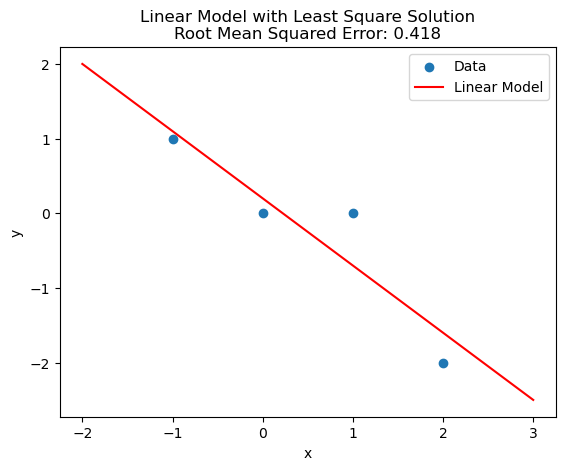

In [9]:
# AI usage: plotting is doen with copilot

# Calculate the predicted values
y_pred = c1[0] + c1[1] * data[:, 0]

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((data[:, 1] - y_pred)**2))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], label='Data')

# Plot the linear model
x = np.linspace(-2, 3, 100)
y = c1[0] + c1[1] * x
plt.plot(x, y, color='red', label='Linear Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Linear Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [10]:
# vector of unknowns (model 2)
n2 = 3
c2 = np.zeros(n2)

# matrix of least squares (model 2)
A2 = np.zeros((m, n2))
A2 = np.column_stack((ones, data[:, 0], data[:, 0]**2))

# Step 1: QR factorization
Q, R = qr_GS(A2)

# Step 2: Extract blocks
R_ = R[:n2, :n2]
d_ = (Q.T @ b)[:n2]

# Step 3: Solve the upper triangular system
c2 = np.linalg.solve(R_, d_)

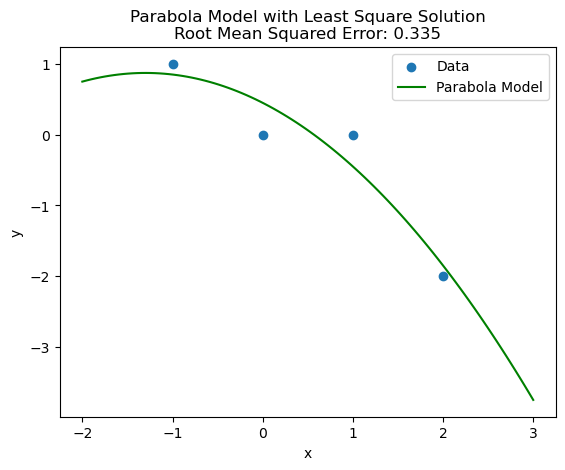

In [11]:
# AI usage: plotting is doen with copilot

# Calculate the predicted values
y_pred = c2[0] + c2[1] * data[:, 0] + c2[2] * data[:, 0]**2

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((data[:, 1] - y_pred)**2))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], label='Data')

# Plot the parabola model
x = np.linspace(-2, 3, 100)
y = c2[0] + c2[1] * x + c2[2] * x**2
plt.plot(x, y, color='green', label='Parabola Model')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Parabola Model with Least Square Solution\nRoot Mean Squared Error: {rmse:.3g}')

# Show legend
plt.legend()

# Show the plot
plt.show()


#### Conditioning (small improvement observed)

**Remark** (Conditioning of least square)

- Solving least square problem using QR factorization shows better conditioning than normal equation.

**Note**

- Only a small improvement was observed.
  - A closer look revealed the results of QR decomposition of Matlab and our current algorithm are different after 8-th column.
  - Possible reasons are (a) different padding of columns, and (b) different QR algorithm.
  - Try again after Householder-QR algorithm is established.

**Example** (ill-conditioned least square problem revisited)

Let $x_0=2.0, x_1=2.2, x_2=2.4, \ldots, x_{10}=4.0$ be equally spaced points in $[2,4]$, and set $y_i=1+x_i+x_i^2+x_i^3+x_i^4+x_i^5+x_i^6+x_i^7$ for $0 \leq i \leq 10$. Use the normal equations to find the least squares polynomial $P(x)=c_1+c_2 x+\cdots+c_8 x^7$ fitting the $\left(x_i, y_i\right)$.

In [12]:
import numpy as np
from internallib import poly_eval

# problem parameters
# Suggestions: To check sanity, set n = 2, 3, 4, 
#   Things get wild soon after n = 5
n = 8       # number of unknowns

# right-hand side vector
x = np.linspace(2., 4., 11)
c_true = np.ones(n)
y = poly_eval(c_true, x)

# matrix
pow = np.arange(n)
# A = x[:, np.newaxis] ** pow       # broadcasting in effect
A = x.reshape(-1, 1) ** pow         # equivalent to the previous line

# Step 1: QR factorization
Q, R = qr_GS(A)

# Step 2: Extract blocks
R_ = R[:n, :n]
d_ = (Q.T @ y)[:n]

# Step 3: Solve the upper triangular system
c = np.linalg.solve(R_, d_)

In [13]:
with np.printoptions(precision=2, suppress=True):
    print(f"{'c_true':<10}{': '}{c_true}")
    print(f"{'c':<10}{': '}{c}")
    print(f"{'x':<10}{': '}{x}")
    print(f"{'y':<10}{': '}{y}")

c_true    : [1. 1. 1. 1. 1. 1. 1. 1.]
c         : [ 2.58 -2.91  5.1  -1.37  1.81  0.83  1.02  1.  ]
x         : [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
y         : [  255.     456.47   785.54  1304.54  2098.34  3280.    4997.33  7440.39
 10850.04 15527.47 21845.  ]


### Householder reflector

- Idea 1: If we have two vectors with the same length, we can find a reflection that sends one vector to the other. 
- Idea 2: Reflection can be expressed as orthogonal matrix.

**Remark**

- Idea 2 can be guessed from being invertible, length-preserving, and nice geometric meaning.

![Householder reflector](https://vzahorui.net/assets/images/linear_algebra/vector_reflection.png)

#### Preliminary

**Lemma** (Rhombus)

Assume that $x$ and $w$ are vectors of the same Euclidean length, $\|x\|_2=\|w\|_2$. Then $w-x$ and $w+x$ are perpendicular.


Proof: Take dot product.

<!-- $$
(w-x)^T(w+x)=w^T w-x^T w+w^T x-x^T x=\|w\|^2-\|x\|^2=0.
$$ -->


**Defintion** (Projection)

A map $P:\mathbb{R}^m \to \mathbb{R}^m$ is called *projection* if $P^2 = P$, that is, $P(Pv)=Pv$ for any $v\in\mathbb{R}^m$. If, in addition, $P^T = P$, then it is called an *orthogonal projection*.

**Theorem** (Projection matrix)

For a matrix $A\in\mathbb{R}^{m\times n}$ ($m\ge n$) of full rank, 

$$
P=A\left(A^T A\right)^{-1} A^T
$$ 

defines the orthogonal projection from $\mathbb{R}^{m}$ onto column space of $A$. In particular, <!--if $A=v$ (a single column), then -->

$$
P=\frac{v v^T}{v^T v}
$$

defines the orthogonal projection from ${R}^{m}$ onto the line $\{\lambda v \ : \  \lambda \in \mathbb{R} \}$.

Proof: 

- Intuitive proof
  - Take the linear combination of $A$ with coefficients being the solution of the normal equation.
- Formal proof: HW problem

**Theorem** (Householder reflector) 

Suppose $x, w\in\mathbb{R}^{m}$ be a nonzero vector with $\|x\|_2 = \| w \|_ 2$. Let $v= w - x$. Then, the *Householder reflector* defined by 

$$
H = I - 2\frac{v v^T}{v^T v}
$$

satisfies

$$
Hx = w.
$$

Furthermore, $H$ is a symmetric, orthogonal matrix, that is $H^T=H$ and $H^T H=I$.

![Householder reflector](https://www.cs.utexas.edu/users/flame/laff/alaff-beta/images/Chapter03/reflector.png)

Figure: University of Texas Austin Computer science department (Householder reflector)


Notation: This figure shares only the idea, but the settings are different.

- Figure: Our settings
- Red vector: $x$
- Blue vector: $w$
- Gray dashed vector: $1/2 v$
- $(I-2uu^H)x$: $w$
<!-- ![Householder reflector](https://blogs.mathworks.com/cleve/files/house_blog_01.png) -->

Proof
<!-- 
$$
\begin{aligned}
H x & =x-2 P x \\
& =w-v-\frac{2 v v^T x}{v^T v} \\
& =w-v-\frac{v v^T x}{v^T v}-\frac{v v^T(w-v)}{v^T v} \\
& =w-v-\frac{v v^T x}{v^T v}-\frac{v v^T(w)}{v^T v}+\frac{v v^T(v)}{v^T v} \\
& =w-\frac{v v^T(w+x)}{v^T v} \\
& =w
\end{aligned}
$$

where we used $x=w-v$ in the first equality, splitted the last term into half and plugged $x=w-v$ into one of them in the second equality, distributed the last term in the third equality, canceled $v$ and combined two terms involving $vv^T/v^Tv$, and used $(w-x) \perp (w+x)$ (previous theorem) in the last equality. -->

Symmetric, orthogonal part is a HW problem.

**Remark**

- Thanks to the previous theorem, we can always reflect one vector ($x$) to another ($w$) as long as their lengths are equal.
- In particular, we can reflect any column vector of $A$, say $A_1 = (a_{11}, a_{21}, \cdots, a_{m1})$ to a standard basis vector $\pm (\|A_1\|, 0, 0, \cdots, 0 )$. 

**Example** (Householder reflector)

Let $x=(3, -2, 5)$. Use Python to verify that the Householder reflector transform $x$ to $(-\|x\|_2, 0, 0)$.

In [14]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

x = np.array([3., -2., 5.])
w = np.array([-np.linalg.norm(x), 0, 0])
v = x - w

H = np.eye(3) - 2 * np.outer(v, v) / np.dot(v, v)

Hx = H @ x

# report verification
print("Hx = w? --->", np.allclose(Hx, w))
print("Hx: ", Hx)
print(" w: ", w)


Hx = w? ---> True
Hx:  [-6.16441400e+00  2.22044605e-16 -7.21644966e-16]
 w:  [-6.164414  0.        0.      ]


#### Algorithm

**Idea**

Step 1: We start with a matrix $A$ that we want to write in the form $A=Q R$. 

- Let $x_1$ be the first column of $A$. 
- Let $w= \pm\left(\left\|x_1\right\|_2, 0, \ldots, 0\right)$. 
  - (Either sign works in theory. For numerical stability, the sign is often chosen to be the opposite of the sign of the first component of $x$ to avoid the possibility of subtracting nearly equal numbers when forming $v=w-x$.) 
- Create the Householder reflector $H_1$ such that $H_1 x=w$. 
  - $H_1=I-2 v v^T / v^T v$ yields $H x=w$. (By Theorem on Householder reflectors) 
- In the $4 \times 3$ case, multiplying $H_1$ by $A$ results in
$$
H_1 A=H_1\left[\begin{array}{ccc}
\times & \times & \times \\
\times & \times & \times \\
\times & \times & \times \\
\times & \times & \times
\end{array}\right]=\left[\begin{array}{ccc}
\times & \times & \times \\
0 & \times & \times \\
0 & \times & \times \\
0 & \times & \times
\end{array}\right] \text {. }
$$


Step 2: Continue in this way with submatrix until $A$ becomes upper triangular.

- Repeat the same procedure with $(H_1A)[1:, 1:]$
  - Find the Householder reflector $\hat{H}_2$ that moves the $(m-1)$-vector $x_2$ (lower $m-1$ entries in column 2 of $H_1 A$) to $\pm\left(\left\|x_2\right\|_2, 0, \ldots, 0\right)$.
  - Since $\hat{H}_2$ is an $(m-1) \times(m-1)$ matrix, define $H_2$ to be the $m \times m$ matrix formed by putting $\hat{H}_2$ into the lower part of the identity matrix. Then
    - This procedure progressively turns $A$ to $R$. Namely, $A$ is altered.
    - Prepare a copy in the code `R = A.copy()`
$$
\left(\begin{array}{c:ccc}
1 & 0 & 0 & 0 \\
\hdashline 
0 & & & \\
0 & & \hat{H}_2 & \\
0 & & &
\end{array}\right)\left(\begin{array}{c:cc}
\times & \times & \times \\
\hdashline
0 & \times & \times \\
 0 & \times & \times \\
0 & \times & \times
\end{array}\right)=\left(\begin{array}{c:cc}
\times & \times & \times \\
\hdashline
0 & \times & \times \\
 0 & 0 & \times \\
0 & 0 & \times
\end{array}\right)
$$



- Repeat the same procedure with $(H_2 H_1 A)[2:, 2:]$

$$
\left(\begin{array}{cc:cc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
\hdashline 0 & 0 &  \\
0 & 0 & & \hat{H}_3
\end{array}\right)\left(\begin{array}{cc:c}
\times & \times & \times \\
0 & \times & \times \\
\hdashline 0 & 0 & \times \\
0 & 0 & \times
\end{array}\right)=\left(\begin{array}{cc:c}
\times & \times & \times \\
0 & \times & \times \\
\hdashline 0 & 0 & \times \\
0 & 0 & 0
\end{array}\right)
$$

- In 4-by-3 case, this results in an upper triangular matrix $R$:
  - `R = H @ R` in code (by recursive nature of loop)
$$
\mathrm{H}_3 \mathrm{H}_2 \mathrm{H}_1 \mathrm{~A}=\mathrm{R},
$$



Step 3: Compute $Q$

- Multiplying on the left by the inverses of the Householder reflectors allows us to rewrite the result as
$A=H_1 H_2 H_3 R=Q R$.
  - Note that $H_i^{-1}=H_i$ since $H_i$ is symmetric orthogonal. 
- In other words,
$$
Q=H_1 H_2 H_3.
$$ 
- `Q = Q @ H` in code (by recursive nature of loop)

**Algorithm** (QR factorization using Householder reflection - human-friendly ver)

Index convention: Python and NumPy

- Given
  - $A$: $m$-by-$n$ matrix ($m\ge n$)
- Initialize
  - $R \gets A$
  - $Q \gets I_m$ ($m$-by-$m$ identity matrix)
- **For** $i=0, 1, 2,\cdots, n -1$
  - $x \gets R[i:, i]$ (where $i$-th column of from and below diagonal)
  - $w \gets (-\mathrm{sign}(x_0) \|x\|_2, 0, 0,\cdots, 0)$ (same size as $x$)
  - $v = w - x$
  - $H = I_m$
  - $H[i:, i:] = I_k - 2vv^T/(v^T v)$ ($k=m-i$)
  - $R = HR$ 
  - $Q = QH$
- Output
  - $Q$, $R$

**Remark** 

- No padding is needed for Householder version of QR factorization as opposed to Gram-Schmidt version.

**Remark** (Aside; Computational improvement)

- (ver 1) The following lines can be improved by implementing multiplications of only necessary submatrices. 
  - Before
    - $H = I_m$
    - $H[i:, i:] = I_k - 2vv^T/(v^T v)$ ($k=m-i$)
    - $R = HR$ 
    - $Q = QH$
  - After
    - $H = I_k - 2vv^T/(v^T v)$ ($k=m-i$)
    - $R[i:, i:] = H @ R[i:, i:]$ (`@` means matrix multiplication)
    - $Q[:, i:] = Q[:, i:] @ H$
  - To see the idea, write out block multiplications.
- (ver 2) Combining construction of $H$ and the multiplication $R[i:, i:] = H @ R[i:, i:]$, we can further achieve more efficient computation by using associative rule of matrix multiplication that requires a smaller number of machine operations. The same idea also applies to computation of $Q$ with a slight difference due to multiplication by $\hat H$ on the right, not on the left as with $R$.
  - $R[i:, i:] = R[i:, i:] - ((2./(v.T @ v))*v) @ (v.T @ R[i:, i:])$
  - To see the idea, compare the machine operations of the versions mentioned.
  - $Q[:, i:] = Q[:, i:] - (Q[:, i:] @ v_) @ v.T$
- While we usually pursue more efficient ways, we will focus on the human-friendly version in class for pedagogical reason. However, once the idea is digested, it is strongly encouraged to modify your code so that it computes more efficiently. 

#### Conditioning (improvement observed)

**Remark** (Conditioning of least square)

- Solving least square problem using QR factorization shows better conditioning than normal equation.

**Note**

- The expected improvement is now observed.
  - Householder reflector is known to be more stable than Gram-Schmidt.
    - This is because Householder reflector is orthogonal matrix, which does not amplify errors. 
  - For this reason, this is the choice for most QR factorization tools. (Sauer (2017) p. 232)

**Example** (ill-conditioned least square problem revisited)

Let $x_0=2.0, x_1=2.2, x_2=2.4, \ldots, x_{10}=4.0$ be equally spaced points in $[2,4]$, and set $y_i=1+x_i+x_i^2+x_i^3+x_i^4+x_i^5+x_i^6+x_i^7$ for $0 \leq i \leq 10$. Use the normal equations to find the least squares polynomial $P(x)=c_1+c_2 x+\cdots+c_8 x^7$ fitting the $\left(x_i, y_i\right)$.

In [7]:
"""
QR factorization via Householder reflectors. 
Computation efficiency version: computation improvement 2
"""
import numpy as np

def qr(A):

    m, n = A.shape
    R = A.copy()
    Q = np.eye(m)

    for i in range(n):
        k = m - i

        x = R[i:, i].reshape(-1, 1)
        w = np.zeros_like(x).reshape(-1, 1)
        w[0] = - np.sign(x[0])*np.linalg.norm(x)

        v = w - x
        v_ = ((2./(v.T @ v))*v)
        R[i:, i:] = R[i:, i:] - v_ @ (v.T @ R[i:, i:])
        
        Q[:, i:] = Q[:, i:] - (Q[:, i:] @ v_) @ v.T

    return Q, R


In [8]:
import numpy as np
from internallib import poly_eval

# problem parameters
# Suggestions: To check sanity, set n = 2, 3, 4, 
#   Things get wild soon after n = 5
n = 8       # number of unknowns

# right-hand side vector
x = np.linspace(2., 4., 11)
c_true = np.ones(n)
y = poly_eval(c_true, x)

# matrix
pow = np.arange(n)
# A = x[:, np.newaxis] ** pow       # broadcasting in effect
A = x.reshape(-1, 1) ** pow         # equivalent to the previous line

# Step 1: QR factorization
Q, R = qr(A)

# Step 2: Extract blocks
R_ = R[:n, :n]
d_ = (Q.T @ y)[:n]

# Step 3: Solve the upper triangular system
c = np.linalg.solve(R_, d_)

In [9]:
# with np.printoptions(precision=4, suppress=True):
print(f"{'c_true':<10}{': '}{c_true}")
print(f"{'c':<10}{': '}{c}")
print(f"{'x':<10}{': '}{x}")
print(f"{'y':<10}{': '}{y}")

c_true    : [1. 1. 1. 1. 1. 1. 1. 1.]
c         : [0.99999996 1.0000001  0.9999999  1.00000005 0.99999998 1.
 1.         1.        ]
x         : [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
y         : [  255.          456.4656128   785.5379584  1304.5441536  2098.3444352
  3280.         4997.3255808  7440.3912704 10850.0381056 15527.4719232
 21845.       ]


In [19]:
# Step 1: QR factorization
Q, R = np.linalg.qr(A)

# Step 2: Extract blocks
R_ = R[:n, :n]
d_ = (Q.T @ y)[:n]

# Step 3: Solve the upper triangular system
c = np.linalg.solve(R_, d_)

print(f"{'c_true':<10}{': '}{c_true}")
print(f"{'c':<10}{': '}{c}")
print(f"{'x':<10}{': '}{x}")
print(f"{'y':<10}{': '}{y}")

c_true    : [1. 1. 1. 1. 1. 1. 1. 1.]
c         : [1.00000008 0.9999998  1.00000022 0.99999986 1.00000005 0.99999999
 1.         1.        ]
x         : [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
y         : [  255.          456.4656128   785.5379584  1304.5441536  2098.3444352
  3280.         4997.3255808  7440.3912704 10850.0381056 15527.4719232
 21845.       ]


### Appendix

### What to be careful of?

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)